<a href="https://colab.research.google.com/github/LauraHu820/5241_Machine_Learning/blob/main/5241_Bagging_boosting_neural_network_hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler

In [ ]:
train = pd.read_csv('adult.data', header=None)
test = pd.read_csv('adult.test', delimiter=',', skiprows=1, header=None)

In [ ]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
train.columns = columns
test.columns = columns

In [ ]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5.0,77516,9.0,13,4.0,0.0,1.0,4.0,1.0,2174,0,40,38.0,0.0
1,50,4.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0.0
2,38,2.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0.0
3,53,2.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0.0
4,28,2.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0.0


In [ ]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2.0,226802,1.0,7,4.0,6.0,3.0,2.0,1.0,0,0,40,37.0,0.0
1,38,2.0,89814,11.0,9,2.0,4.0,0.0,4.0,1.0,0,0,50,37.0,0.0
2,28,1.0,336951,7.0,12,2.0,10.0,0.0,4.0,1.0,0,0,40,37.0,1.0
3,44,2.0,160323,15.0,10,2.0,6.0,0.0,2.0,1.0,7688,0,40,37.0,1.0
5,34,2.0,198693,0.0,6,4.0,7.0,1.0,4.0,1.0,0,0,30,37.0,0.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30162 non-null  int64  
 1   workclass       30162 non-null  float64
 2   fnlwgt          30162 non-null  int64  
 3   education       30162 non-null  float64
 4   education-num   30162 non-null  int64  
 5   marital-status  30162 non-null  float64
 6   occupation      30162 non-null  float64
 7   relationship    30162 non-null  float64
 8   race            30162 non-null  float64
 9   sex             30162 non-null  float64
 10  capital-gain    30162 non-null  int64  
 11  capital-loss    30162 non-null  int64  
 12  hours-per-week  30162 non-null  int64  
 13  native-country  30162 non-null  float64
 14  income          30162 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 3.7 MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15060 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             15060 non-null  int64  
 1   workclass       15060 non-null  float64
 2   fnlwgt          15060 non-null  int64  
 3   education       15060 non-null  float64
 4   education-num   15060 non-null  int64  
 5   marital-status  15060 non-null  float64
 6   occupation      15060 non-null  float64
 7   relationship    15060 non-null  float64
 8   race            15060 non-null  float64
 9   sex             15060 non-null  float64
 10  capital-gain    15060 non-null  int64  
 11  capital-loss    15060 non-null  int64  
 12  hours-per-week  15060 non-null  int64  
 13  native-country  15060 non-null  float64
 14  income          15060 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 1.8 MB


In [ ]:
for col in train.select_dtypes(include=['object', 'category']).columns:
    print(f"{col}: {train[col].unique()}")

print()

for col in test.select_dtypes(include=['object', 'category']).columns:
    print(f"{col}: {test[col].unique()}")

In [ ]:
# preprocessing
# delete row with "?"
train = train.replace(' ?', np.nan).dropna()
test = test.replace(' ?', np.nan).dropna()

In [ ]:
# ordinal encoding
for col in train.select_dtypes(include=['object', 'category']).columns:
    encoder = OrdinalEncoder()
    train[col] = encoder.fit_transform(train[col].values.reshape(-1, 1))

    encoder = OrdinalEncoder()
    test[col] = encoder.fit_transform(test[col].values.reshape(-1, 1))

In [ ]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5.0,77516,9.0,13,4.0,0.0,1.0,4.0,1.0,2174,0,40,38.0,0.0
1,50,4.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0.0
2,38,2.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0.0
3,53,2.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0.0
4,28,2.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0.0


In [ ]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2.0,226802,1.0,7,4.0,6.0,3.0,2.0,1.0,0,0,40,37.0,0.0
1,38,2.0,89814,11.0,9,2.0,4.0,0.0,4.0,1.0,0,0,50,37.0,0.0
2,28,1.0,336951,7.0,12,2.0,10.0,0.0,4.0,1.0,0,0,40,37.0,1.0
3,44,2.0,160323,15.0,10,2.0,6.0,0.0,2.0,1.0,7688,0,40,37.0,1.0
5,34,2.0,198693,0.0,6,4.0,7.0,1.0,4.0,1.0,0,0,30,37.0,0.0


In [ ]:
train[14].value_counts()

,count
14,
0.0,22654
1.0,7508


In [ ]:
test[14].value_counts()

,count
14,
0.0,11360
1.0,3700


In [ ]:
X_train = train.drop('income', axis=1)
y_train = train['income']
X_test = test.drop('income', axis=1)
y_test = test['income']

part a

i)

In [ ]:
# decision tree
tree_depth = range(1, 50)
train_acc = []
test_acc = []

for depth in tree_depth:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, dt.predict(X_train)))
    test_acc.append(accuracy_score(y_test, dt.predict(X_test)))

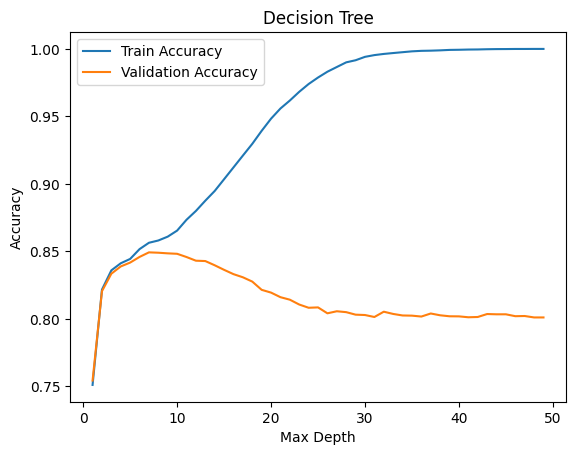

In [ ]:
plt.plot(tree_depth, train_acc, label="Train Accuracy")
plt.plot(tree_depth, test_acc, label="Validation Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree")
plt.legend()
plt.show()

In [ ]:
# random forest
train_acc_rf_depth = []
test_acc_rf_depth = []

train_acc_rf_features = []
test_acc_rf_features = []

feature_num = range(1, 14)

for depth in tree_depth:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    train_acc_rf_depth.append(accuracy_score(y_train, rf.predict(X_train)))
    test_acc_rf_depth.append(accuracy_score(y_test, rf.predict(X_test)))

for num in feature_num:
    rf = RandomForestClassifier(n_estimators=100, max_depth=10, max_features=num, random_state=42)
    rf.fit(X_train, y_train)
    train_acc_rf_features.append(accuracy_score(y_train, rf.predict(X_train)))
    test_acc_rf_features.append(accuracy_score(y_test, rf.predict(X_test)))


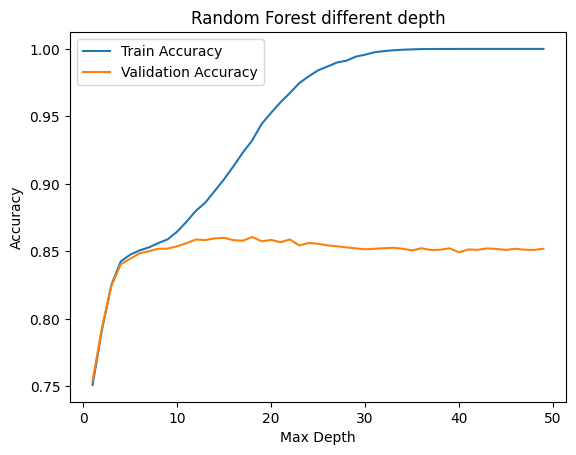

In [ ]:
plt.plot(tree_depth, train_acc_rf_depth, label="Train Accuracy")
plt.plot(tree_depth, test_acc_rf_depth, label="Validation Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Random Forest different depth")
plt.legend()
plt.show()

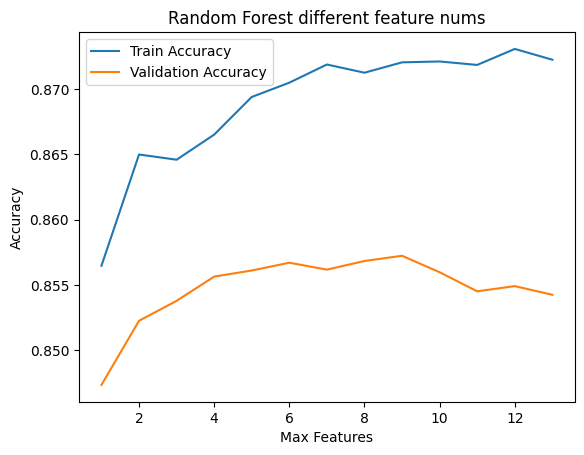

In [ ]:
plt.plot(feature_num, train_acc_rf_features, label="Train Accuracy")
plt.plot(feature_num, test_acc_rf_features, label="Validation Accuracy")
plt.xlabel("Max Features")
plt.ylabel("Accuracy")
plt.title("Random Forest different feature nums")
plt.legend()
plt.show()

In [ ]:
n_estimators = range(1, 100)
train_acc_rf_estimators = []
test_acc_rf_estimators = []

for num in n_estimators:
    rf = RandomForestClassifier(n_estimators=num, max_depth=10, max_features=7, random_state=42)
    rf.fit(X_train, y_train)
    train_acc_rf_estimators.append(accuracy_score(y_train, rf.predict(X_train)))
    test_acc_rf_estimators.append(accuracy_score(y_test, rf.predict(X_test)))

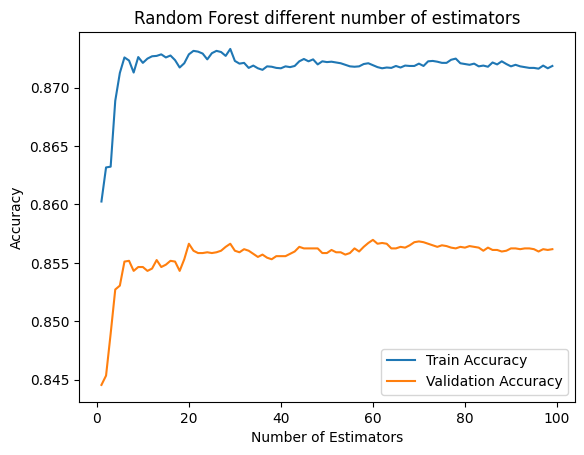

In [ ]:
plt.plot(n_estimators, train_acc_rf_estimators, label="Train Accuracy")
plt.plot(n_estimators, test_acc_rf_estimators, label="Validation Accuracy")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest different number of estimators")
plt.legend()
plt.show()

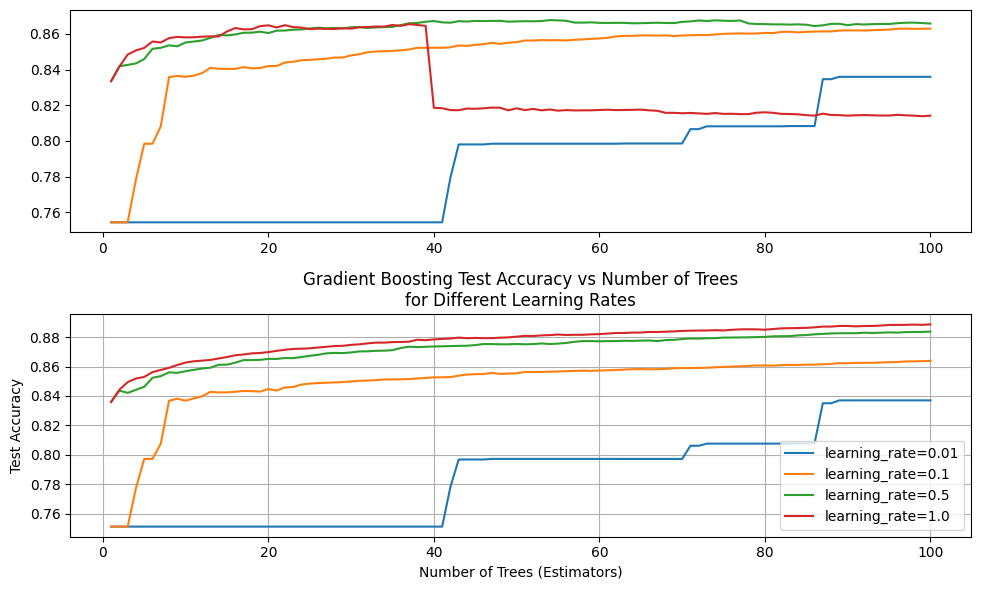

In [ ]:
# gradient boosting
learning_rates = [0.01, 0.1, 0.5, 1.0]
n_estimators = 100

fig, axes = plt.subplots(2, 1, figsize=(10, 6))

for lr in learning_rates:
    gbc = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=lr, random_state=0)
    gbc.fit(X_train, y_train)

    test_accuracies = []
    train_accuracies = []

    for y_pred in gbc.staged_predict(X_test):
        test_accuracies.append(accuracy_score(y_test, y_pred))

    for y_pred in gbc.staged_predict(X_train):
        train_accuracies.append(accuracy_score(y_train, y_pred))

    axes[0].plot(range(1, n_estimators + 1), test_accuracies, label=f'learning_rate={lr}')
    axes[1].plot(range(1, n_estimators + 1), train_accuracies, label=f'learning_rate={lr}')

plt.xlabel('Number of Trees (Estimators)')
plt.ylabel('Test Accuracy')
plt.title('Gradient Boosting Test Accuracy vs Number of Trees\nfor Different Learning Rates')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

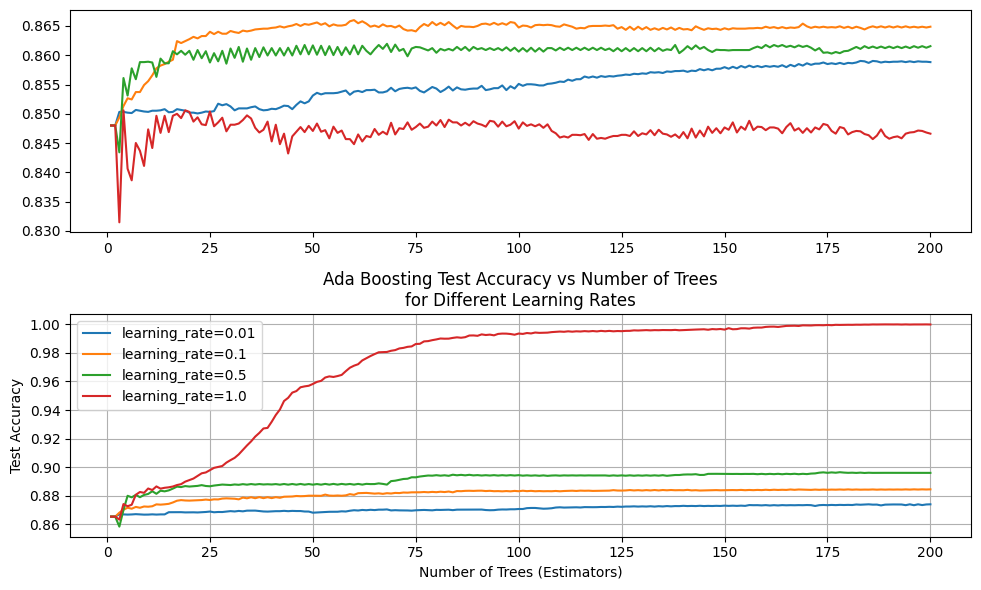

In [ ]:
# ada boosting
learning_rates = [0.01, 0.1, 0.5, 1.0]
n_estimators = 200

fig, axes = plt.subplots(2, 1, figsize=(10, 6))

for lr in learning_rates:
    base_estimator = DecisionTreeClassifier(max_depth=10)
    ada = AdaBoostClassifier(estimator=base_estimator, n_estimators=n_estimators, learning_rate=lr, random_state=0)
    ada.fit(X_train, y_train)

    test_accuracies = []
    train_accuracies = []

    for y_pred in ada.staged_predict(X_test):
        test_accuracies.append(accuracy_score(y_test, y_pred))

    for y_pred in ada.staged_predict(X_train):
        train_accuracies.append(accuracy_score(y_train, y_pred))

    axes[0].plot(range(1, n_estimators + 1), test_accuracies, label=f'learning_rate={lr}')
    axes[1].plot(range(1, n_estimators + 1), train_accuracies, label=f'learning_rate={lr}')

plt.xlabel('Number of Trees (Estimators)')
plt.ylabel('Test Accuracy')
plt.title('Ada Boosting Test Accuracy vs Number of Trees\nfor Different Learning Rates')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# ii) proper tuning
# decision tree
param_dt = {'max_depth':[5,10,15,20,25,30], 'min_samples_split':[2,4,6,8,10]}

start = time.time()
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_dt, cv=5)

grid_dt.fit(X_train, y_train)
dt_time = time.time() - start
print(grid_dt.best_params_)

{'max_depth': 10, 'min_samples_split': 4}


In [ ]:
grid_dt.best_estimator_.fit(X_train, y_train)
accuracy_dt = accuracy_score(y_test, grid_dt.best_estimator_.predict(X_test))
print('the accuracy score for decision tree best estimator is', accuracy_dt)
print('time takes', dt_time)

the accuracy score for decision tree best estimator is 0.8480743691899071
time takes 20.306370735168457


In [ ]:
# random forest
param_rf = {'n_estimators':[50, 100,150], 'max_depth':[1,5,10], 'max_features':[5, 10, 14]}

start = time.time()
grid_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=5)
grid_rf.fit(X_train, y_train)
rf_time = time.time() - start
print(grid_rf.best_params_)

{'n_estimators': 150, 'max_features': 10, 'max_depth': 10}


In [ ]:
grid_rf.best_estimator_.fit(X_train, y_train)
accuracy_rf = accuracy_score(y_test, grid_rf.best_estimator_.predict(X_test))
print('the accuracy score for random forest best estimator is', accuracy_rf)
print('time takes', rf_time)

the accuracy score for random forest best estimator is 0.8553784860557769
time takes 144.99509739875793


In [ ]:
# ada boosting
param_ada = {'n_estimators':[50,100,150, 200], 'learning_rate':[0.05, 0.1, 0.5, 1]}

start = time.time()
grid_ada = RandomizedSearchCV(AdaBoostClassifier(random_state=42), param_ada, cv=5)
grid_ada.fit(X_train, y_train)
ada_time = time.time() - start

print(grid_ada.best_params_)

{'n_estimators': 200, 'learning_rate': 1}


In [ ]:
grid_ada.best_estimator_.fit(X_train, y_train)
accuracy_ada = accuracy_score(y_test, grid_ada.best_estimator_.predict(X_test))
print('the accuracy score for ada boosting best estimator is', accuracy_ada)
print('time takes', ada_time)

the accuracy score for ada boosting best estimator is 0.852456839309429
time takes 126.7231194972992


In [ ]:
# gradient boosting
param_gb = {'n_estimators':[50,100,150, 200], 'learning_rate':[0.05, 0.1,0,5, 1]}

start = time.time()
grid_gb = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_gb, cv=5)
grid_gb.fit(X_train, y_train)
gb_time = time.time() - start

print(grid_gb.best_params_)

{'n_estimators': 150, 'learning_rate': 0.1}


In [ ]:
grid_gb.best_estimator_.fit(X_train, y_train)
accuracy_gb = accuracy_score(y_test, grid_gb.best_estimator_.predict(X_test))
print('the accuracy score for gradient boosting best estimator is', accuracy_gb)
print('time takes', gb_time)

the accuracy score for gradient boosting best estimator is 0.8563745019920319
time takes 236.13988995552063


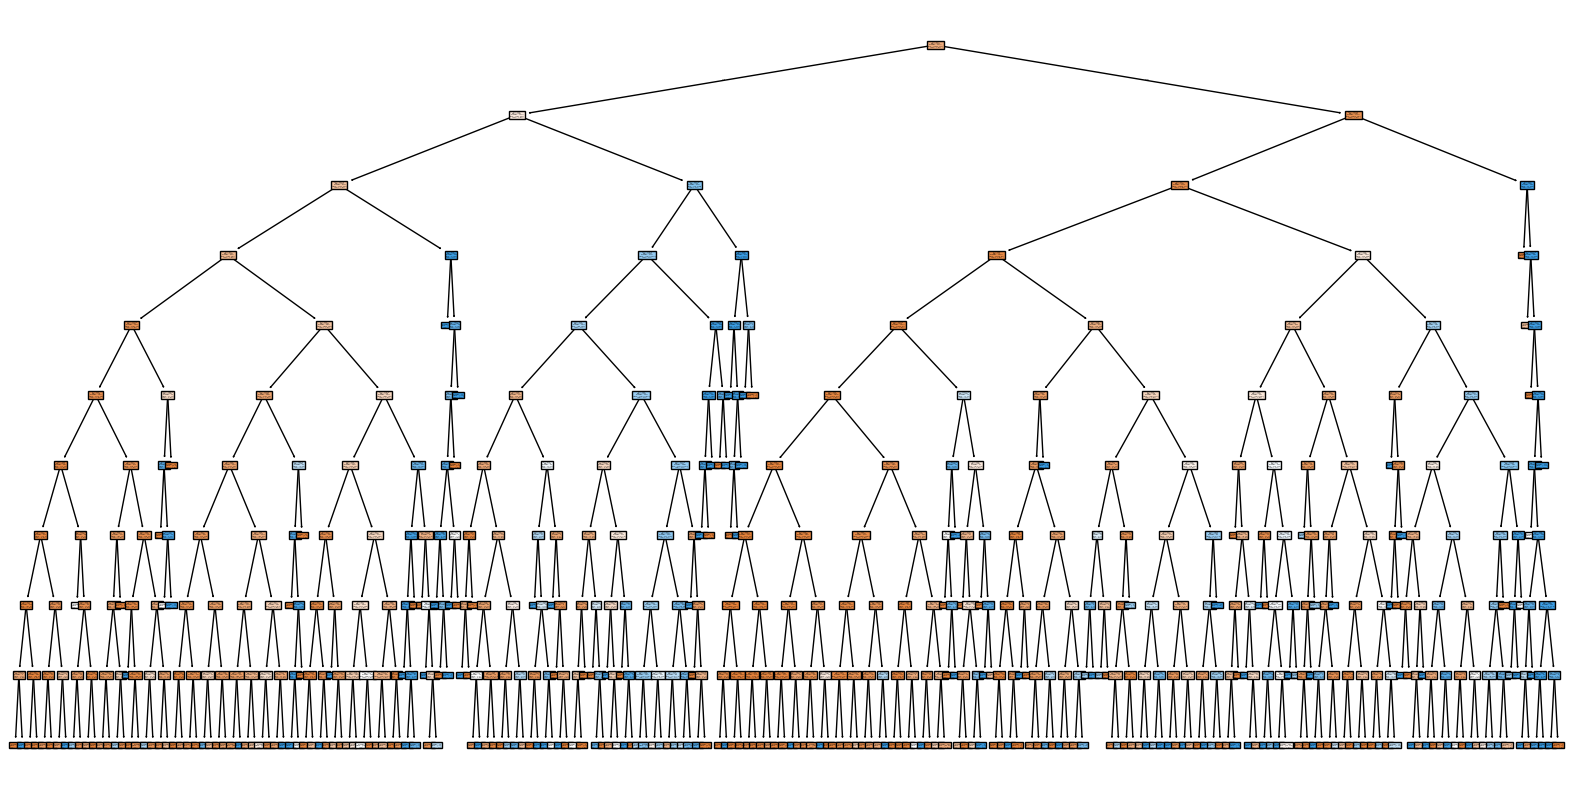

In [ ]:
# iii: interpretation
# decision tree
plt.figure(figsize=(20, 10))
plot_tree(grid_dt.best_estimator_, filled=True, feature_names=X_train.columns, class_names=['<=50K', '>50K'])
plt.show()

In [ ]:
importance_dt_series = pd.Series(grid_dt.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importance_dt_series

,0
relationship,0.380127
education-num,0.208414
capital-gain,0.203623
capital-loss,0.058374
age,0.050023
hours-per-week,0.039654
fnlwgt,0.016017
occupation,0.014948
workclass,0.014141
education,0.004663


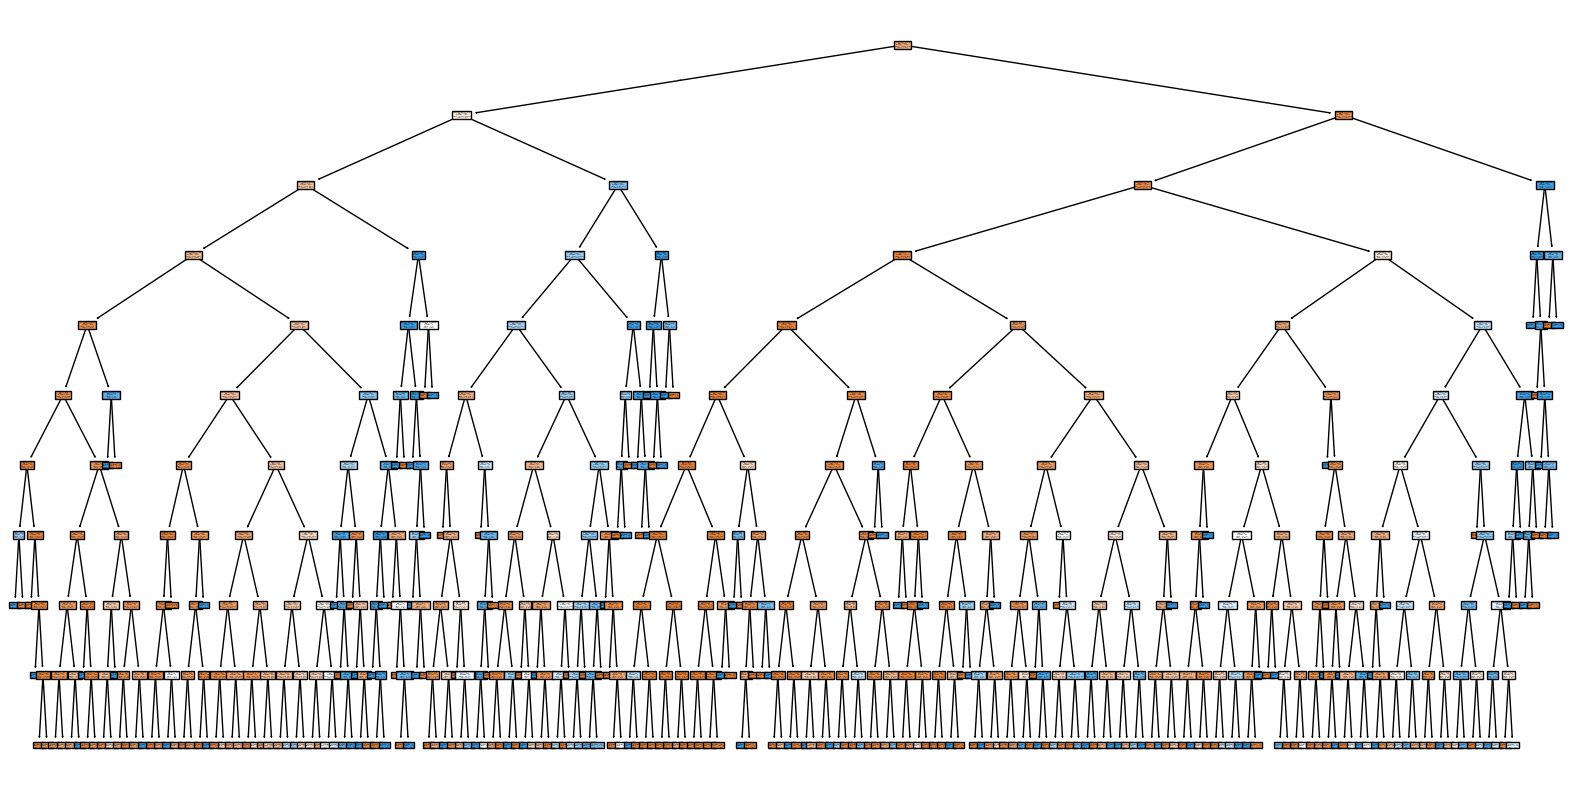

In [ ]:
# random forest
estimator = grid_rf.best_estimator_[0]
plt.figure(figsize=(20,10))
plot_tree(estimator, filled=True, feature_names=X_train.columns, class_names=['<=50K', '>50K'])
plt.show()

In [ ]:
importance_rf_series = pd.Series(grid_rf.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importance_rf_series

,0
relationship,0.320407
capital-gain,0.211097
education-num,0.184439
age,0.058807
capital-loss,0.058012
marital-status,0.042856
hours-per-week,0.041221
fnlwgt,0.025615
occupation,0.017696
education,0.016635


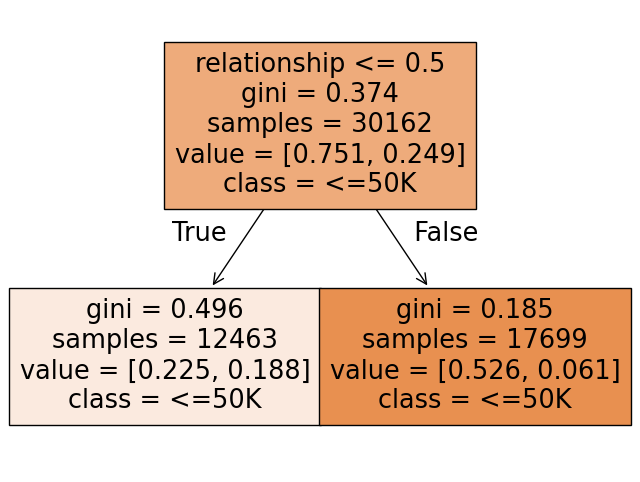

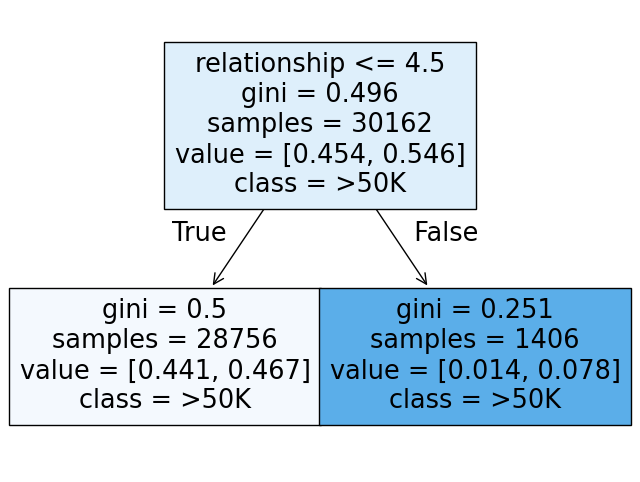

In [ ]:
# ada boosting
estimator_0 = grid_ada.best_estimator_[0]
estimator_10 = grid_ada.best_estimator_[10]

plt.figure(figsize=(8,6))
plot_tree(estimator_0, filled=True, feature_names=X_train.columns, class_names=['<=50K', '>50K'])
plt.show()

plt.figure(figsize=(8, 6))
plot_tree(estimator_10, filled=True, feature_names=X_train.columns, class_names=['<=50K', '>50K'])
plt.show()

In [ ]:
ada_importance_series = pd.Series(grid_ada.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)
ada_importance_series

,0
relationship,0.260023
capital-gain,0.228523
capital-loss,0.129636
age,0.109510
education-num,0.089926
occupation,0.057802
hours-per-week,0.040699
marital-status,0.028923
workclass,0.016320
sex,0.012982


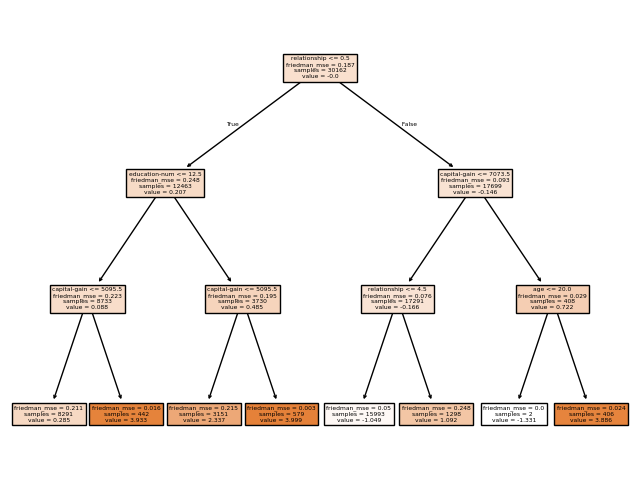

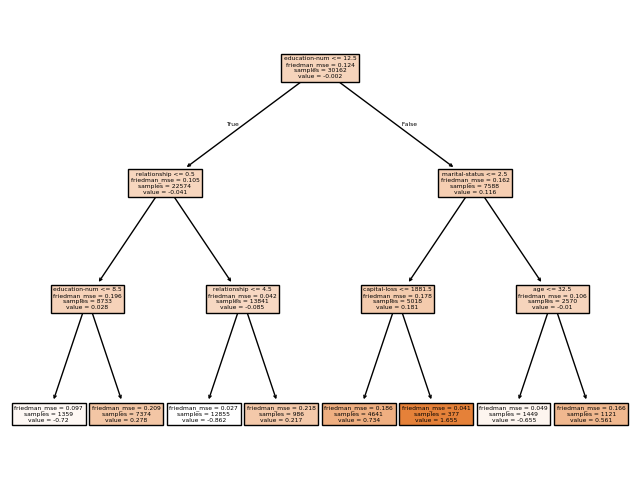

In [ ]:
# gradient boosting
estimator_0_gb = grid_gb.best_estimator_[0, 0]
estimator_10_gb = grid_gb.best_estimator_[10, 0]

plt.figure(figsize=(8,6))
plot_tree(estimator_0_gb, filled=True, feature_names=X_train.columns, class_names=['<=50K', '>50K'])
plt.show()

plt.figure(figsize=(8, 6))
plot_tree(estimator_10_gb, filled=True, feature_names=X_train.columns, class_names=['<=50K', '>50K'])
plt.show()

In [ ]:
gb_importance_series = pd.Series(grid_gb.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)
gb_importance_series

,0
relationship,0.349724
capital-gain,0.219763
education-num,0.201627
capital-loss,0.066074
age,0.062804
hours-per-week,0.036424
occupation,0.023564
marital-status,0.020614
workclass,0.006580
fnlwgt,0.005152


In [ ]:
# b) neural network
# i)
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# Convert to tensors
X_train_tensor = torch.from_numpy(X_train.values).float()
y_train_tensor = torch.from_numpy(y_train.values).long()
X_test_tensor = torch.from_numpy(X_test.values).float()
y_test_tensor = torch.from_numpy(y_test.values).long()

In [ ]:
# Define a MLP with arbitrary hidden layers
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes, activation=nn.ReLU):
        super(MLP, self).__init__()
        dimensions = [input_size] + hidden_sizes + [num_classes]
        self.linears = nn.ModuleList([nn.Linear(dimensions[i], dimensions[i+1])
                                      for i in range(len(dimensions) - 1)])
        self.activation = activation()

    def forward(self, x):
        for layer in self.linears[:-1]:
            x = self.activation(layer(x))
        out = self.linears[-1](x)
        return out

# Functions to train and test the model
def train_model(model, X, y, loss_fn, optimizer, num_epochs):
    train_loss, test_loss = [], []
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X)
        loss = loss_fn(outputs, y)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        # Save losses
        with torch.no_grad():
            train_loss.append(loss.item())
            test_loss.append(loss_fn(model(X_test_tensor), y_test_tensor).item())
    return train_loss, test_loss

def evaluate_model(model, X, y):
    with torch.no_grad():
        outputs = model(X)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == y).sum().item()
        return correct / y.size(0)

# Hyperparameters
num_epochs = 2000
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()

In [ ]:
def init_weights(m, init_method):
    if isinstance(m, nn.Linear):
        init_method(m.weight)
        try:
            init_method(m.bias)
        # Some methods can only initialize 2D tensors
        except ValueError:
            nn.init.uniform_(m.bias)

In [ ]:
# i)
params = [{
    'num_layers':1, 'h':32, 'activation':'Sigmoid', 'opt':(torch.optim.SGD, 0.0007), 'initialization':(nn.init.normal_, "Normal")},
          {'num_layers':2, 'h':64, 'activation':'Tanh', 'opt':(torch.optim.Adam, 0.001), 'initialization':(nn.init.uniform_, "Uniform")}]

train_losses = dict()
test_losses = dict()
accuracies = dict()

In [ ]:
for param in params:
  model = MLP(X_train_tensor.shape[1], [param['h']] * param['num_layers'], 2, activation=getattr(nn, param['activation']))
  model.apply(lambda m: init_weights(m, param['initialization'][0]))
  optimizer = param['opt'][0](model.parameters(), lr=param['opt'][1])
  train_losses[str(param)], test_losses[str(param)] = train_model(model, X_train_tensor, y_train_tensor, loss_fn, optimizer, num_epochs)
  accuracies[str(param)] = evaluate_model(model, X_test_tensor, y_test_tensor)


In [ ]:
train_losses

{"{'num_layers': 1, 'h': 32, 'activation': 'Sigmoid', 'opt': (<class 'torch.optim.sgd.SGD'>, 0.0007), 'initialization': (<function normal_ at 0x7908c801d800>, 'Normal')}": [1.0678050518035889,
  1.0667403936386108,
  1.0656623840332031,
  1.0645562410354614,
  1.0635204315185547,
  1.0624582767486572,
  1.0613961219787598,
  1.0603004693984985,
  1.0592483282089233,
  1.0580949783325195,
  1.0570340156555176,
  1.0559732913970947,
  1.05491304397583,
  1.0538532733917236,
  1.0527939796447754,
  1.0517349243164062,
  1.0506765842437744,
  1.0496182441711426,
  1.0485602617263794,
  1.0475025177001953,
  1.0464457273483276,
  1.045389175415039,
  1.0443329811096191,
  1.043276309967041,
  1.0422210693359375,
  1.041166067123413,
  1.0401115417480469,
  1.0390570163726807,
  1.0380030870437622,
  1.0369495153427124,
  1.0358964204788208,
  1.0348433256149292,
  1.0337910652160645,
  1.0327394008636475,
  1.0316877365112305,
  1.0306366682052612,
  1.0295861959457397,
  1.0285357236862183

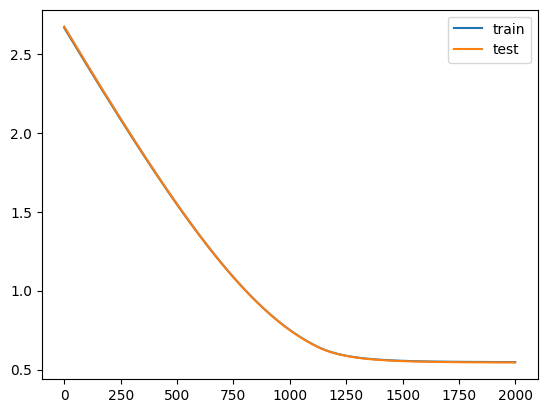

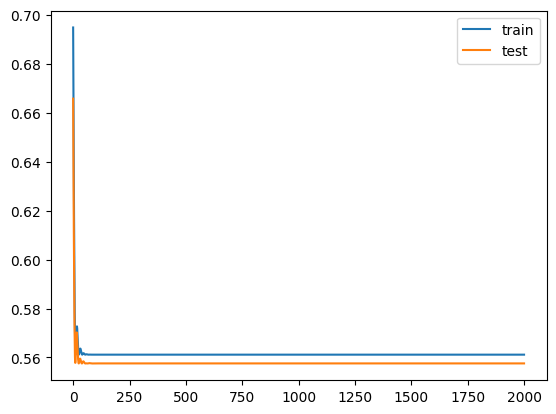

In [ ]:
for key in train_losses.keys():
  plt.plot(train_losses[key], label=f'train')
  plt.plot(test_losses[key], label=f'test')
  plt.legend()
  plt.show()

In [ ]:
# tuning
from sklearn.model_selection import train_test_split

In [ ]:
X_new_train_tensor, X_val_tensor, y_new_train_tensor, y_val_tensor = train_test_split(X_train_tensor, y_train_tensor, test_size=0.2, random_state=42)

In [ ]:
accuracies_val = {}
accuracies_test = {}
nn_time = {}

In [ ]:
for param in params:
  model = MLP(X_new_train_tensor.shape[1], [params[0]['h']] * params[0]['num_layers'], 2, activation=getattr(nn, params[0]['activation']))
  model.apply(lambda m: init_weights(m, params[0]['initialization'][0]))
  optimizer = params[0]['opt'][0](model.parameters(), lr=params[0]['opt'][1])
  start = time.time()
  train_losses[str(params[0])], test_losses[str(param[0])] = train_model(model, X_train_tensor, y_train_tensor, loss_fn, optimizer, num_epochs)
  nn_time[str(params[0])] = time.time() - start
  accuracies_val[str(params[0])] = evaluate_model(model, X_test_tensor, y_test_tensor)


In [ ]:
for key in accuracies_val.keys():
  print(f'accuracy for {key} is')
  print(accuracies_val[key])
  print('time takes', nn_time[key])

accuracy for {'num_layers': 1, 'h': 32, 'activation': 'Sigmoid', 'opt': (<class 'torch.optim.sgd.SGD'>, 0.0007), 'initialization': (<function normal_ at 0x7908c801d800>, 'Normal')} is
0.7538538040775733
time takes 50.17773723602295
accuracy for {'num_layers': 2, 'h': 64, 'activation': 'Tanh', 'opt': (<class 'torch.optim.adam.Adam'>, 0.001), 'initialization': (<function uniform_ at 0x7908c801d760>, 'Uniform')} is
0.7463948284435604
time takes 113.31739044189453


In [ ]:
model = MLP(X_new_train_tensor.shape[1], [params[0]['h']] * params[0]['num_layers'], 2, activation=getattr(nn, params[0]['activation']))
model.apply(lambda m: init_weights(m, params[0]['initialization'][0]))
optimizer = params[0]['opt'][0](model.parameters(), lr=params[0]['opt'][1])
start = time.time()
train_losses[str(params[0])], test_losses[str(params[0])] = train_model(model, X_train_tensor, y_train_tensor, loss_fn, optimizer, num_epochs)
nn_time[str(params[0])] = time.time() - start
accuracies_val[str(params[0])] = evaluate_model(model, X_test_tensor, y_test_tensor)

In [ ]:
print(f'accuracy for {params[0]} is')
print(accuracies_val[str(params[0])])
print('time takes', nn_time[str(params[0])])

accuracy for {'num_layers': 1, 'h': 32, 'activation': 'Sigmoid', 'opt': (<class 'torch.optim.sgd.SGD'>, 0.0007), 'initialization': (<function normal_ at 0x7908c801d800>, 'Normal')} is
0.7602257636122178
time takes 55.887919425964355


Problem 2

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
taiwanese_bankruptcy_prediction = fetch_ucirepo(id=572)

# data (as pandas dataframes)
X = taiwanese_bankruptcy_prediction.data.features
y = taiwanese_bankruptcy_prediction.data.targets

# metadata
print(taiwanese_bankruptcy_prediction.metadata)

# variable information
print(taiwanese_bankruptcy_prediction.variables)


{'uci_id': 572, 'name': 'Taiwanese Bankruptcy Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/572/taiwanese+bankruptcy+prediction', 'data_url': 'https://archive.ics.uci.edu/static/public/572/data.csv', 'abstract': 'The data were collected from the Taiwan Economic Journal  for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 6819, 'num_features': 95, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Bankrupt?'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5004D', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': Non

In [ ]:
# preprocessing
X.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

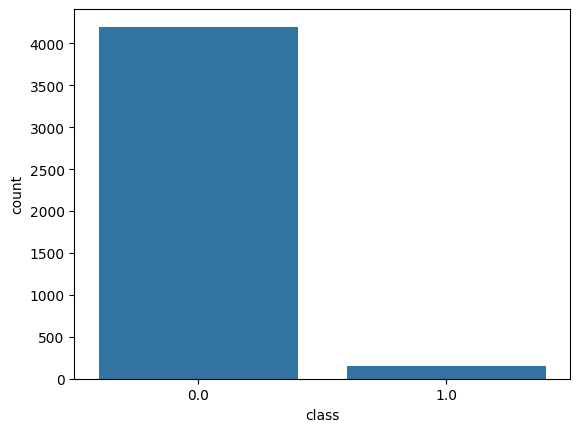

In [ ]:
 # box plot of class counts
 df_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
 df_train['class'] = y_train

 sns.countplot(x='class', data=df_train)
 plt.show()

In [ ]:
# UMAP visualization
import umap
from sklearn.decomposition import PCA

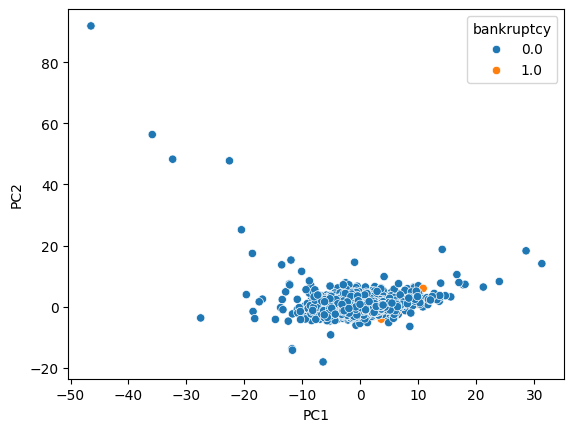

In [ ]:
# visualization
# PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

pca_df = pd.DataFrame(X_train_pca[:, :2], columns=[f'PC{i+1}' for i in range(2)])
pca_df['bankruptcy'] = y_train
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue = 'bankruptcy', palette='tab10')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


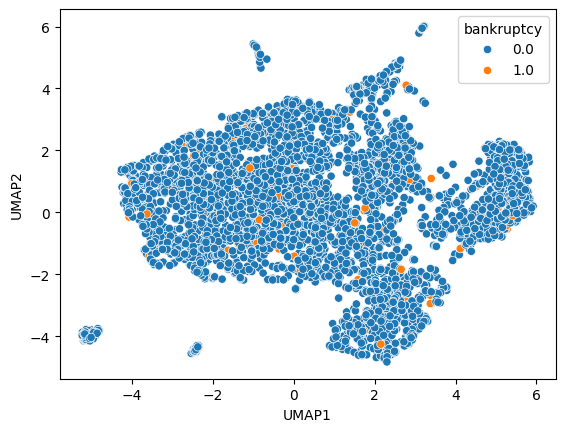

In [ ]:
umap = umap.UMAP(n_components=2)
X_train_umap = umap.fit_transform(X_train_scaled)

umap_df = pd.DataFrame(X_train_umap, columns=[f'UMAP{i+1}' for i in range(2)])
umap_df['bankruptcy'] = y_train
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue = 'bankruptcy', palette='tab10')
plt.show()

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# use lasso to do feature selection
param = {'alpha':[0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(), param, cv=5)
lasso_grid.fit(X_train_scaled, y_train)

lasso_grid.best_params_
lasso_grid.best_estimator_.coef_

array([-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.61103486e-02, -1.17229782e-17,  0.00000000e+00,  1.11982041e-02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [ ]:
X_train_selected = X_train_scaled[:, lasso_grid.best_estimator_.coef_ != 0]
X_test_selected = X_test_scaled[:, lasso_grid.best_estimator_.coef_ != 0]

In [ ]:
print('the features I selected:', X_train.columns[lasso_grid.best_estimator_.coef_ != 0])

the features I selected: Index([' Debt ratio %', ' Net worth/Assets', ' Borrowing dependency',
       ' Cash/Current Liability', ' Working Capital/Equity',
       ' Current Liability to Current Assets', ' Net Income to Total Assets'],
      dtype='object')


In [ ]:
# do smote
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_selected, y_train)


In [ ]:
X_train_smote.shape

(10572, 7)

In [ ]:
y_train_smote.shape

(10572, 1)

In [ ]:
# model fitting process
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
params = {
    'Decision Tree' : {'max_depth':[5,10,15,20,25,30], 'min_samples_split':[2,4,6,8,10]},
    'Random Forest' : {'n_estimators':[50, 100,150], 'max_depth':[1,5,10], 'max_features':[3,5,7]},
    'Logistic Regression' : {'C':[0.001, 0.01, 0.1, 1, 10]},
    'SVM' : {'C':[0.01, 0.1,0.5], 'kernel':['linear', 'rbf']},
    'Gradient Boosting' : {'n_estimators':[50,100,150, 200], 'learning_rate':[0.05, 0.1,0,5, 1]}
}

models = {
    'Decision Tree' : DecisionTreeClassifier(random_state=42),
    'Random Forest' : RandomForestClassifier(random_state=42),
    'Logistic Regression' : LogisticRegression(random_state=42),
    'SVM' : SVC(random_state=42),
    'Gradient Boosting' : GradientBoostingClassifier(random_state=42)
}

accuracies = {
    'Decision Tree' : [],
    'Random Forest' : [],
    'Logistic Regression' : [],
    'SVM' : [],
    'Gradient Boosting' : []
}

In [ ]:
# split validation set
X_train_small, X_val, y_train_small, y_val = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

In [ ]:
y_train_small_array = np.array(y_train_small).flatten()
y_val_array = np.array(y_val).flatten()

In [ ]:
for model_name, model in models.items():
  random_search = RandomizedSearchCV(model, params[model_name], cv=5)
  random_search.fit(X_train_small, y_train_small_array)
  best_model = random_search.best_estimator_
  best_model.fit(X_train_small, y_train_small_array)
  print(f'the accuracy for {model_name} is', accuracy_score(y_val_array, best_model.predict(X_val)))


the accuracy for Decision Tree is 0.9304964539007092
the accuracy for Random Forest is 0.9333333333333333


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


the accuracy for Logistic Regression is 0.8643026004728133


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


the accuracy for SVM is 0.8553191489361702
the accuracy for Gradient Boosting is 0.9092198581560283


In [ ]:
y_test_array = np.array(y_test).flatten()
y_smote_array = np.array(y_train_smote).flatten()

In [ ]:
rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), {'n_estimators':[50, 100,150], 'max_depth':[1,5,10], 'max_features':[3,5,7]}, cv=5)
rf.fit(X_train_smote, y_smote_array)
best_rf = rf.best_estimator_
best_rf.fit(X_train_smote, y_train_smote)
prediction = best_rf.predict(X_test_selected)
print(f'the accuracy for random forest is', accuracy_score(y_test_array, prediction))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


the accuracy for random forest is 0.9090909090909091


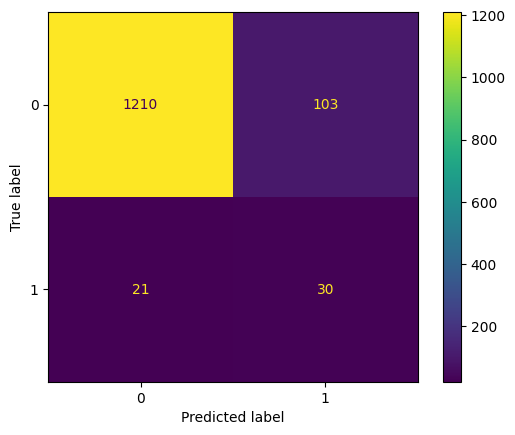

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_array, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot()
plt.show()

In [ ]:
print('the precision is', cm[1,1]/(cm[1,1]+cm[0,1]))
print('the recall is', cm[1,1]/(cm[1,1]+cm[1,0]))

the precision is 0.22556390977443608
the recall is 0.5882352941176471


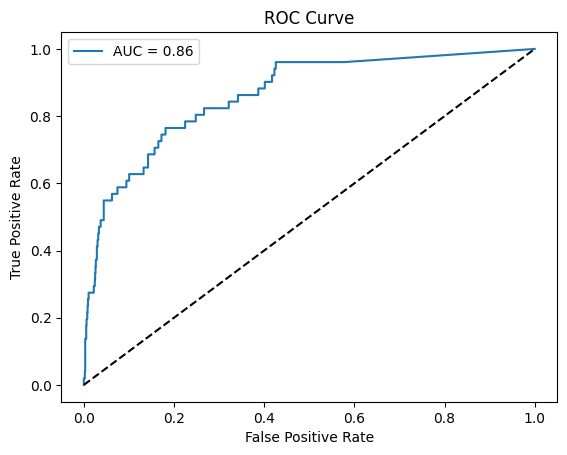

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_scores = best_rf.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_array, y_scores)
auc = roc_auc_score(y_test_array, y_scores)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
# feature importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train_selected.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. feature  Pre-tax net Interest Rate (0.5129018263807473)
2. feature  ROA(B) before interest and depreciation after tax (0.2116868464406783)
3. feature  ROA(A) before interest and % after tax (0.08226674998831385)
4. feature  ROA(C) before interest and depreciation before interest (0.07111296216503153)
5. feature  Operating Profit Rate (0.06464918750760414)
6. feature  Realized Sales Gross Margin (0.054497595373052675)
7. feature  Operating Gross Margin (0.002884832144572206)
